# INFO-F-422 -  Statistical Foundations of Machine Learning 

### De Vos Sebastien - __[Sebastien.De.Vos@ulb.be](mailto:student1@ulb.ac.be) - Student ID 459907__
### Kalai Tarik - __[Tarik.Kalai@ulb.be](mailto:student2@ulb.ac.be) - Student ID 459631__
### Rubas Diego - __[Diego.Rubas@ulb.be](mailto:student3@ulb.ac.be) - Student ID 459733__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


# Exploratory Data Anaylsis

In this section we will be viewing and understanding the data that we have.

### Data loading

In [2]:
training_set_features <- read.csv("sample_data/training_set_features.csv", stringsAsFactors  = T)
training_set_labels <- read.csv("sample_data/training_set_labels.csv", stringsAsFactors  = T)
test_set_features <- read.csv("sample_data/test_set_features.csv", stringsAsFactors  = T)
submission_format <- read.csv("sample_data/submission_format.csv", stringsAsFactors  = T)

### Dimensions of the data samples. 

In [4]:
cat("dimension of test_set_features: ",  dim(test_set_features), "\n")# This will be the input to the model (after it had been trained), the answer the model
#will be providing will then be sent to DrivenData. 

cat("dimension of training_set_labels: ", dim(training_set_labels), "\n") # Answers to training_set_features. 

cat("dimension of training_set_features : ", dim(training_set_features), "\n") # Corresponding to a sample of data: will be used for training set and test set. 
#The result will then be "validated" with a comparison with training_set_labels

dimension of test_set_features:  26708 36 
dimension of training_set_labels:  26707 3 
dimension of training_set_features :  26707 36 


### Data preview

In [276]:
# To generalise the function, we need to take into account the empty answers and not only NA. 
cleanData <- function(x) {
    res <- list()
    for (i in 2:22) {
        x <- transform_na(x, i)
    }
    return(x) #return
}

transform_na <- function(x, index){
    if (length(which(is.na(x[,index]))) > 0) { #Check if there is any NA in the column
            mean_ts <- mean(x[,index], na.rm = T) #compute old_mean
            sd_ts <- sqrt(var(x[,index], na.rm = T)) #compute old_sd
            feature_name <- names(x[index]) #remember the name of the feature we are dealing with
            x[is.na(x[,index]), index] <- round(mean_ts + sd_ts/2) #modify the data
        }
    return(x)
}

norm<-function(x){
    return( (x-min(x)) / (max(x)-min(x)) )
}

one_hot_encoding <- function(x, index) {
    names <- levels(x[,index]) # get the names of all the possible different values
    new_col <- model.matrix(~0+x[,index]) # transforms the column in a matrix with a '1' in the correct column and '0' otherwise
    attr(new_col, "dimnames")[[2]] <- names
    new_col <- as.data.frame(new_col)
    x <- data.frame(x[1:index-1],new_col,x[(index+1):ncol(x)])
    return(x)
}

cast_into_double <- function(x){
    for (i in 2:length(x)){
        x[,i] <- as.double(x[,i])
    }
    return(x)
}

In [286]:
training_set_features <- read.csv("sample_data/training_set_features.csv", stringsAsFactors  = T)

# preprocessing <- function(x) {
#     x <- cleanData(training_set_features)
#     for (i in 2:length(x)){
#         levels(x[,i]) <- switch(
#             i,
#             23 = levels(x[,i]) <- c(1, 2, 3, 4, 5), 
#             24 = levels(x[,i]) <- c(0, 1, 2, 4, 3),
#             31 =  levels(x[,i]) <- c(0, 2, 1, 3), 
#         )

#         if (i == 25 || i = 29) { #Not going to work, need to think about it
#            x <- one_hot_encoding(x, i)
#         }
#         else if (i == 32) {
#            levels(x[,i])[1] <- 'marital_status_not_specified'
#            x <- one_hot_encoding(x, 32)
#         }
#         else if (i == 35) {
#            levels(x[,i])[1] <- 'rental_not_specified'
#             x <- one_hot_encoding(x, i)
#         }
#         else if (i == 38) {
#            levels(training_set_features[,i])[1] <- 'employment_not_specified'
#             training_set_features <- one_hot_encoding(training_set_features, i)
#         }
#         else if (i == 42) {
#            x <- subset(training_set_features, select = -i)
#         }
#     }
# }

# for feature 2 -> 22
training_set_features <- cleanData(training_set_features)
# for feature 23
levels(training_set_features[,23]) <- c(1, 2, 3, 4, 5)

# for feature 24
levels(training_set_features[,24]) <- c(0, 1, 2, 4, 3)

# for feature 25
training_set_features <- one_hot_encoding(training_set_features, 25)

# for feature 26 -> number 29
training_set_features <- one_hot_encoding(training_set_features, 29)

# for feature 27 -> number 31 !!! it needs to be changed, it is not a good way to sort this data.
levels(training_set_features[,31]) <- c(0, 2, 1, 3) 

# for feature 28 -> number 32
levels(training_set_features[,32])[1] <- 'marital_status_not_specified'
training_set_features <- one_hot_encoding(training_set_features, 32)

# for feature 29 -> number 35
levels(training_set_features[,35])[1] <- 'rental_not_specified'
training_set_features <- one_hot_encoding(training_set_features, 35)

#for features 30 -> number 38
levels(training_set_features[,38])[1] <- 'employment_not_specified'
training_set_features <- one_hot_encoding(training_set_features, 38)
 
# for feature 31 -> 42, we deemed its contribution was negligible against its cost of implementation
training_set_features <- subset(training_set_features, select = -42)

# for feature 32 -> 42 (since we dropped previous column)
training_set_features <- one_hot_encoding(training_set_features, 42)

# for feature 33 -> 45
training_set_features <- transform_na(training_set_features, 45)

# for feature 34 -> 46
training_set_features <- transform_na(training_set_features, 46)

# for feature 35 -> 47, we deemed its contribution was negligible against its cost of implementation
training_set_features <- subset(training_set_features, select = -47)

# for feature 36 -> 47, we deemed its contribution was negligible against its cost of implementation
training_set_features <- subset(training_set_features, select = -47)



training_set_features <- cast_into_double(training_set_features)
name <- names(training_set_features)[-1]
temp <- apply(training_set_features[2:length(training_set_features)], 2 , norm)
attr(temp, "dimnames")[[2]] <- name
training_set_features <- data.frame(training_set_features[1],as.data.frame(temp))


head(training_set_features[40:46])
dim(training_set_features)

,Not.in.Labor.Force,Unemployed,MSA..Not.Principle..City,MSA..Principle.City,Non.MSA,household_adults,household_children
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,1,0.0000000,0
2,0,0,1,0,0,0.0000000,0
3,0,0,1,0,0,0.6666667,0
4,1,0,0,1,0,0.0000000,0
5,0,0,1,0,0,0.3333333,0
6,0,0,0,1,0,0.6666667,1


[1] 26707    46

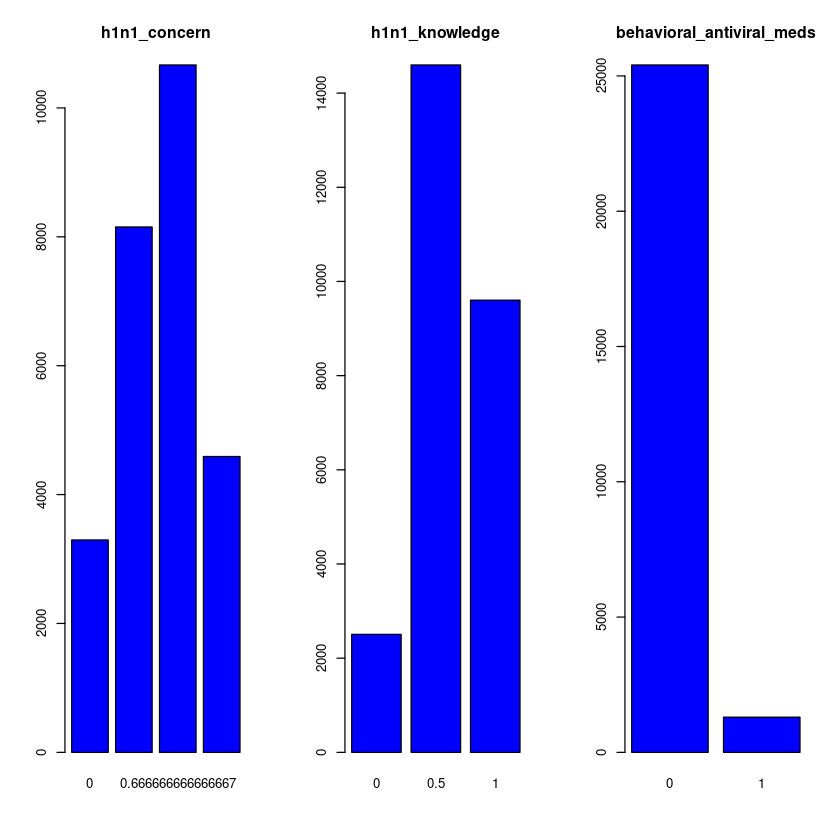

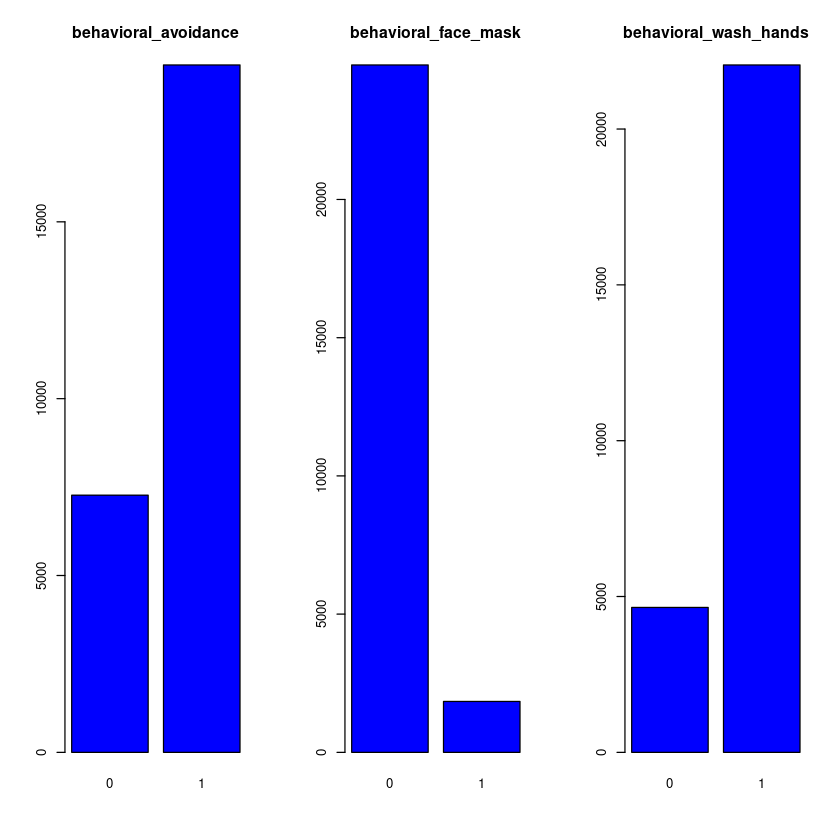

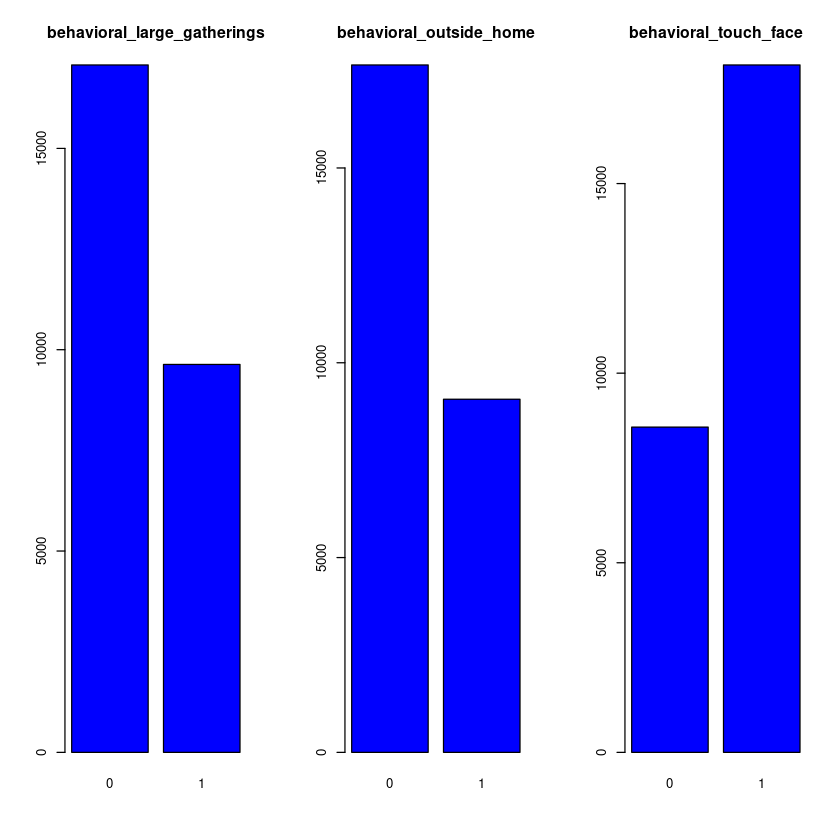

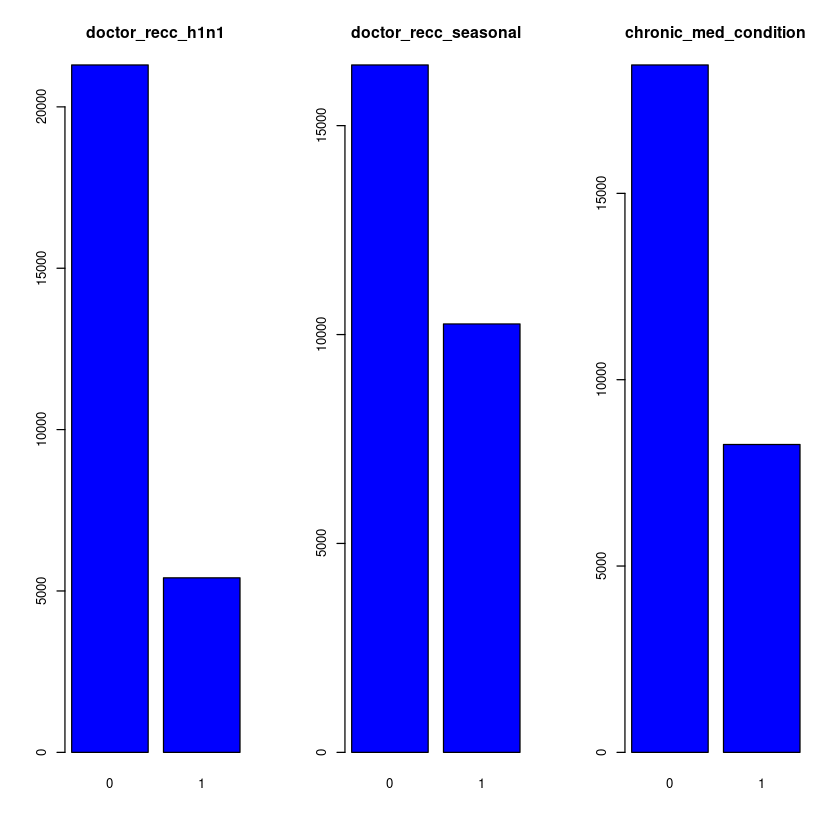

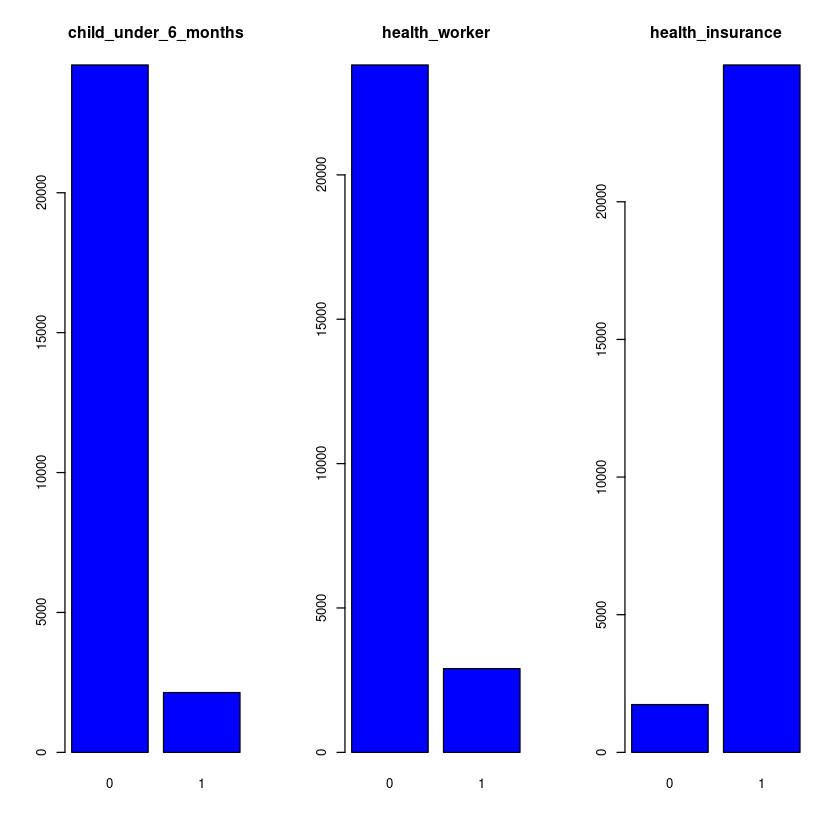

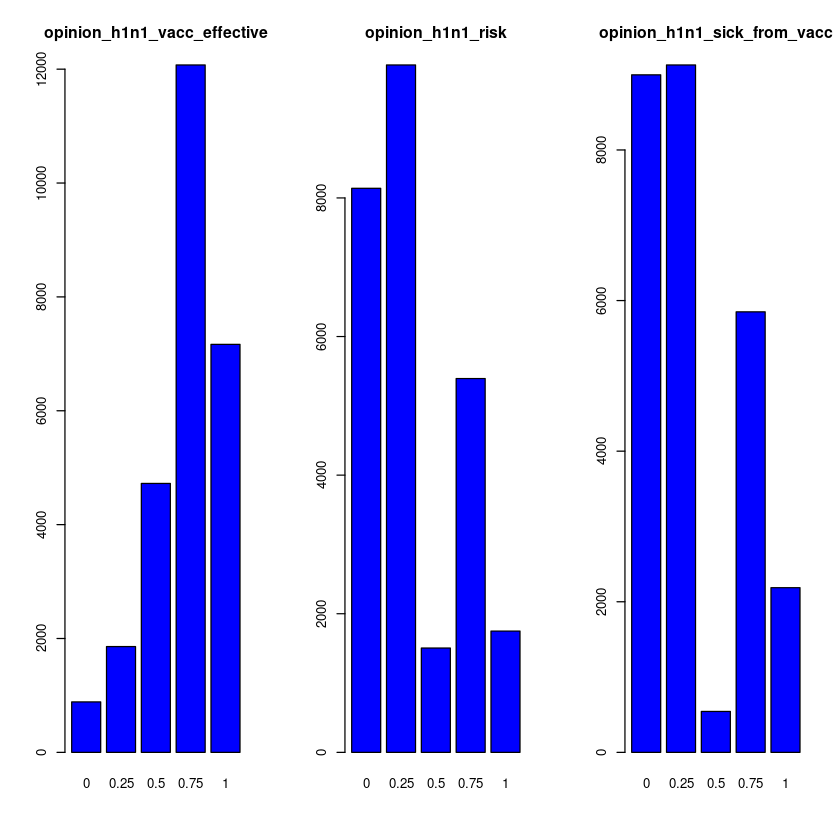

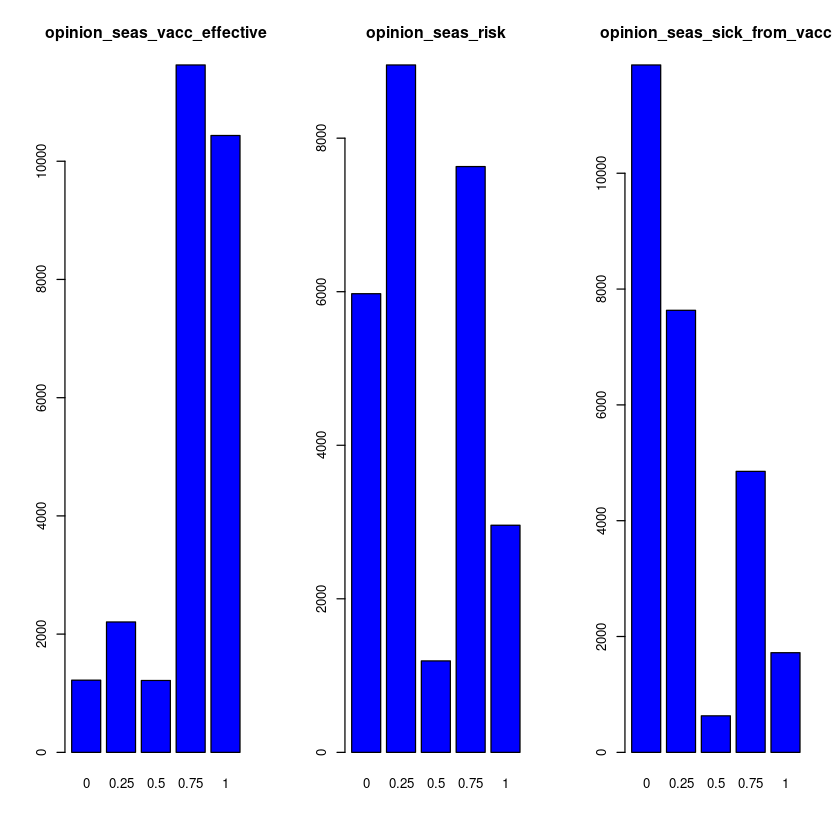

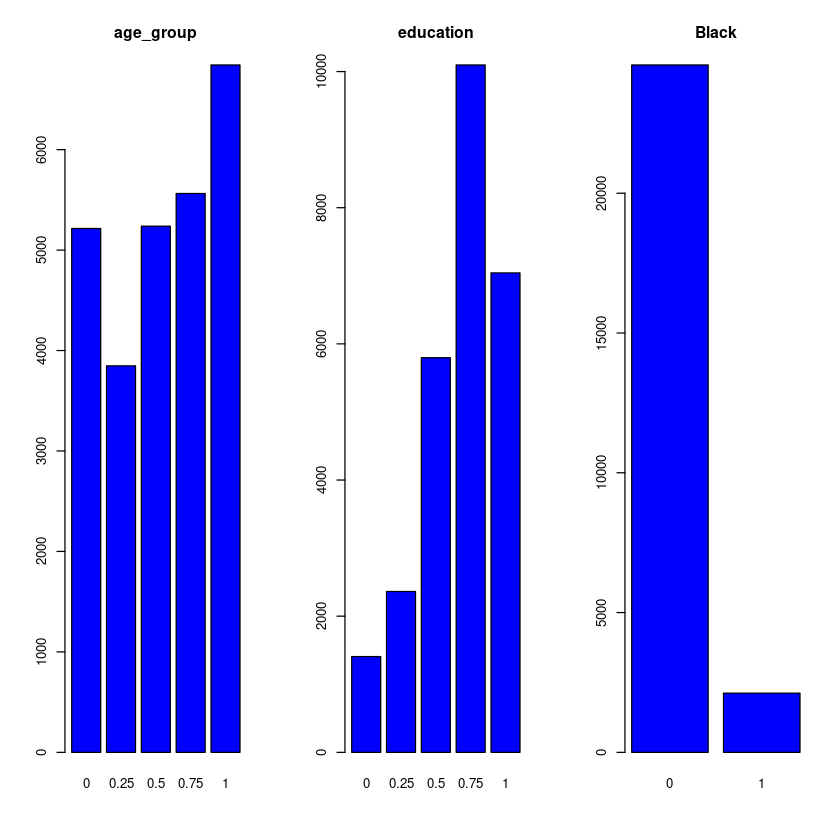

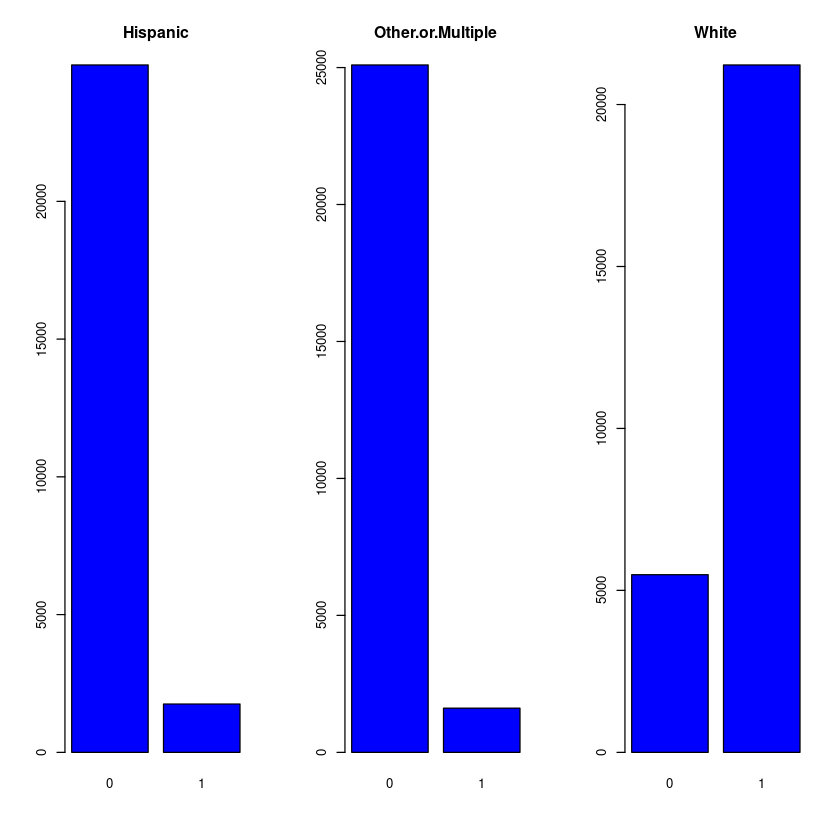

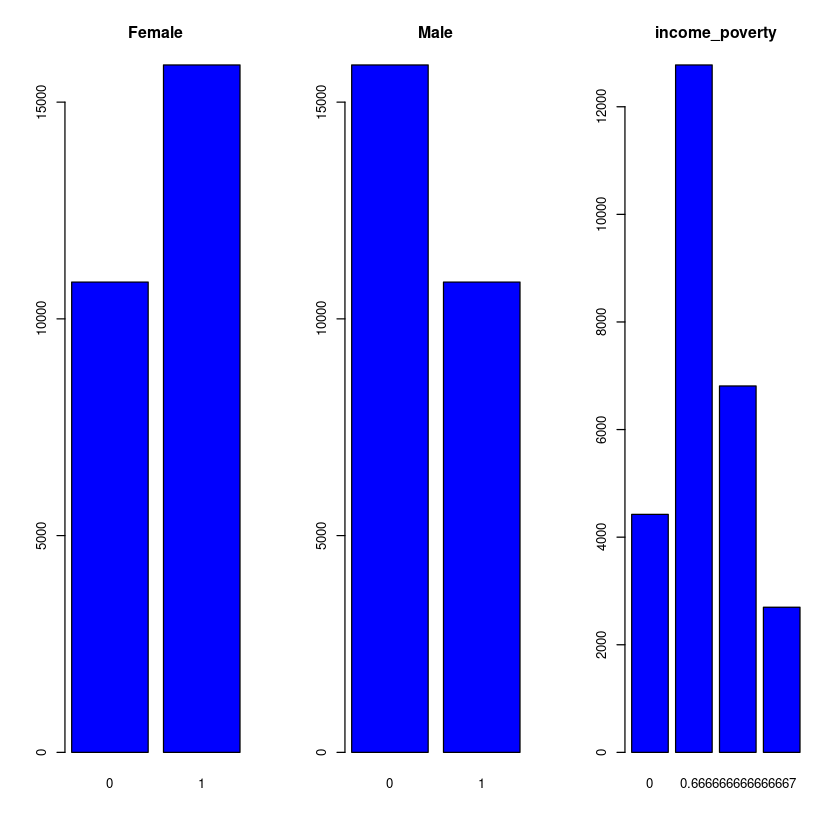

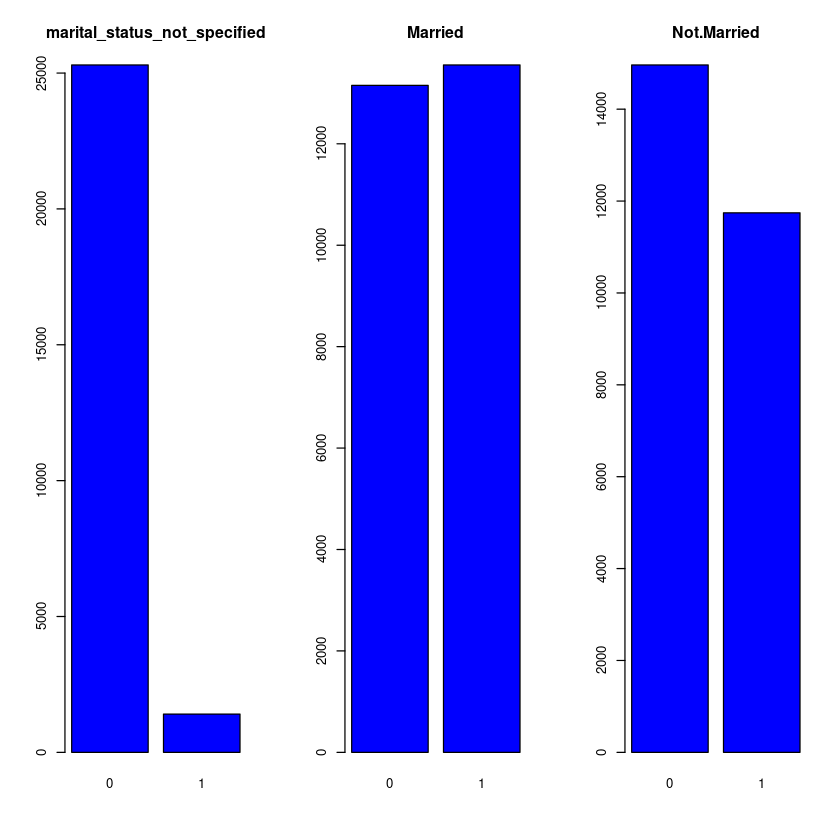

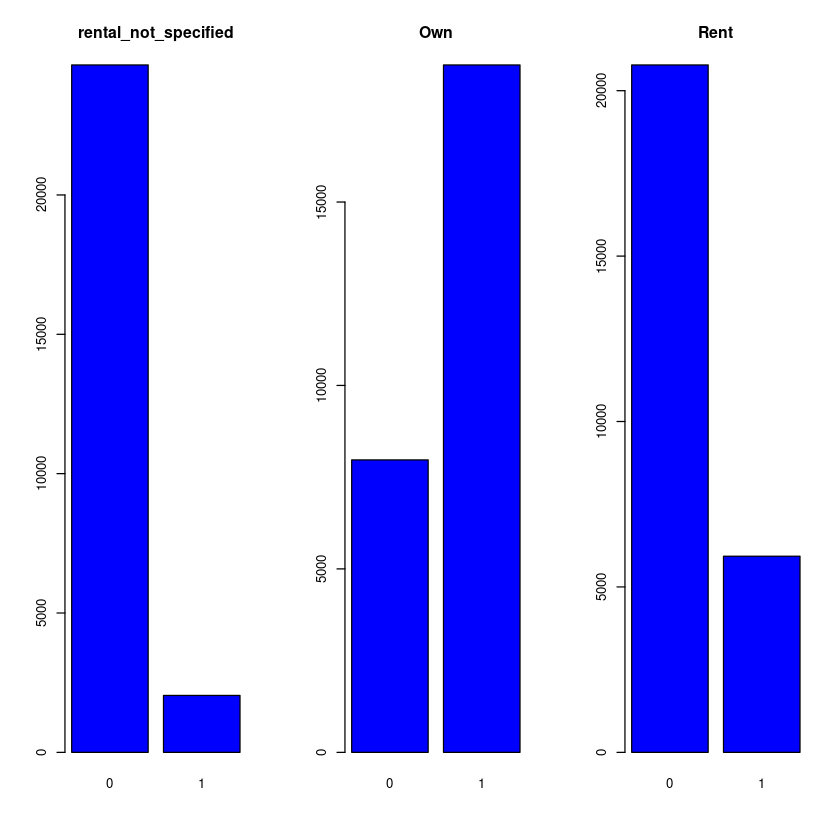

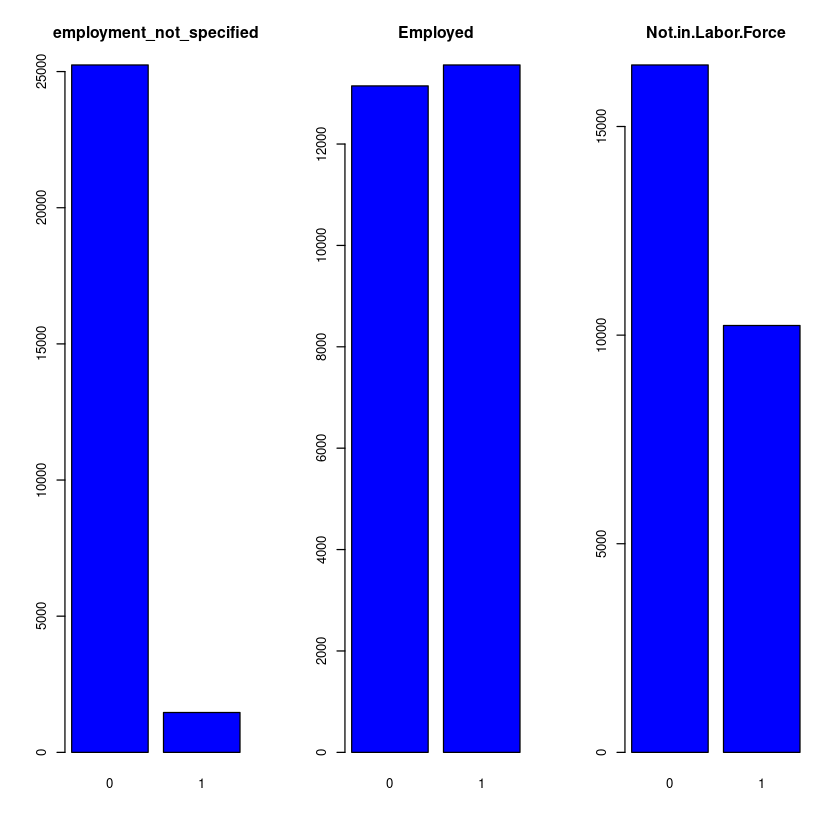

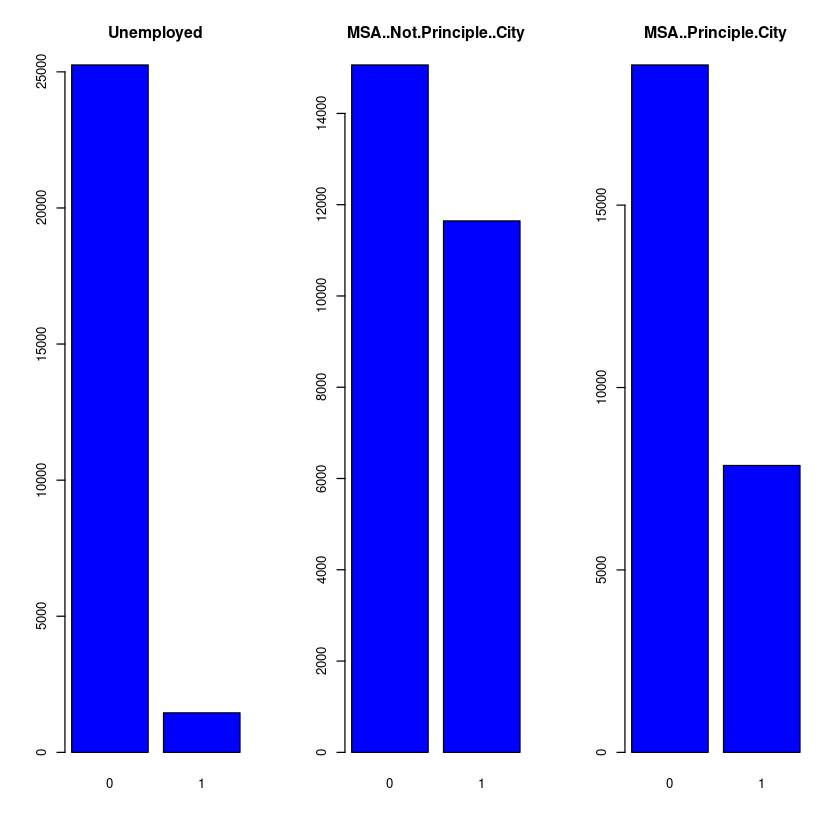

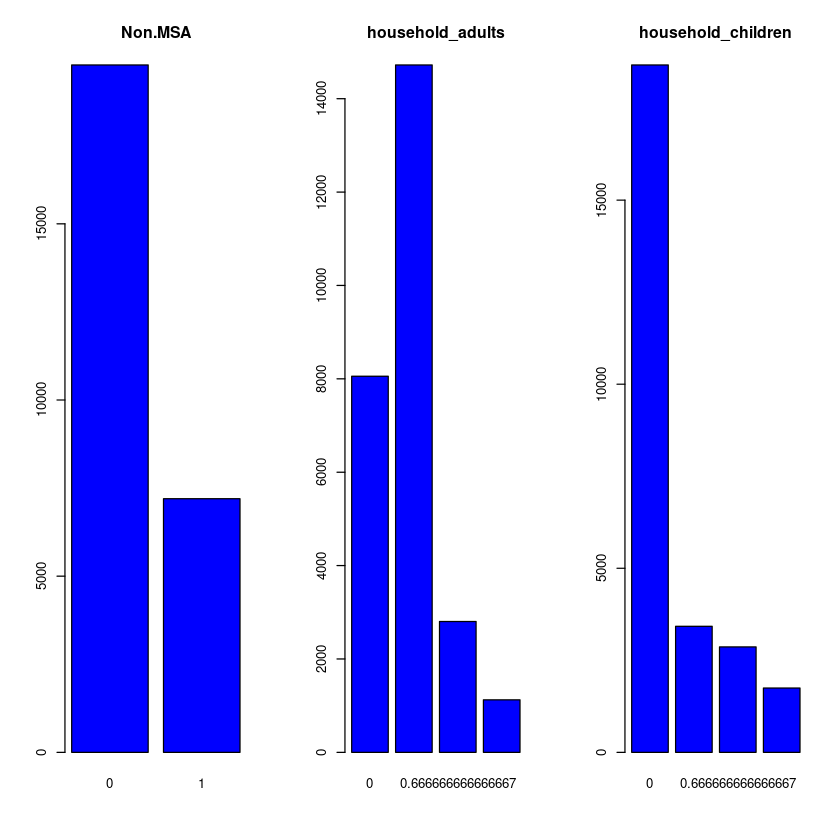

In [287]:
par(mfrow=c(1,3))

# data_to_plot <- table(training_set_features["h1n1_concern"])
# data_to_plot <- table(t(training_set_features["h1n1_knowledge"]))

names<-names(training_set_features)
for(i in 2:length(names)){
    barplot(table(training_set_features[names[i]]), col="blue", main=names[i],beside=T) 
}

# Data preprocessing

## Missing value imputation

## Feature engineering

## Feature selection



# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  
\begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





# Conclusions